## Statistiques basiques
### Tailles des fichiers

Je commence par parcourir les fichiers de mon corpus pour connaître leurs tailles (en nombre de tokens)

In [16]:
import os
import glob
from nltk import word_tokenize
import matplotlib.pyplot as plt

In [19]:
def get_token_count(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        tokens = word_tokenize(text)
        return len(tokens)

def get_file_token_counts(directory):
    file_token_counts = []
    for root, dirs, files in os.walk(directory):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            if file_path.endswith('.txt'):
                token_count = get_token_count(file_path)
                file_token_counts.append((file_path, token_count))
    return file_token_counts

def plot_file_token_counts(file_token_counts):
    file_paths, token_counts = zip(*file_token_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(file_paths, token_counts, color='skyblue')
    plt.xlabel('Fichier')
    plt.ylabel('Taille du fichier en tokens')
    plt.title('Représentation des fichiers en taille')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


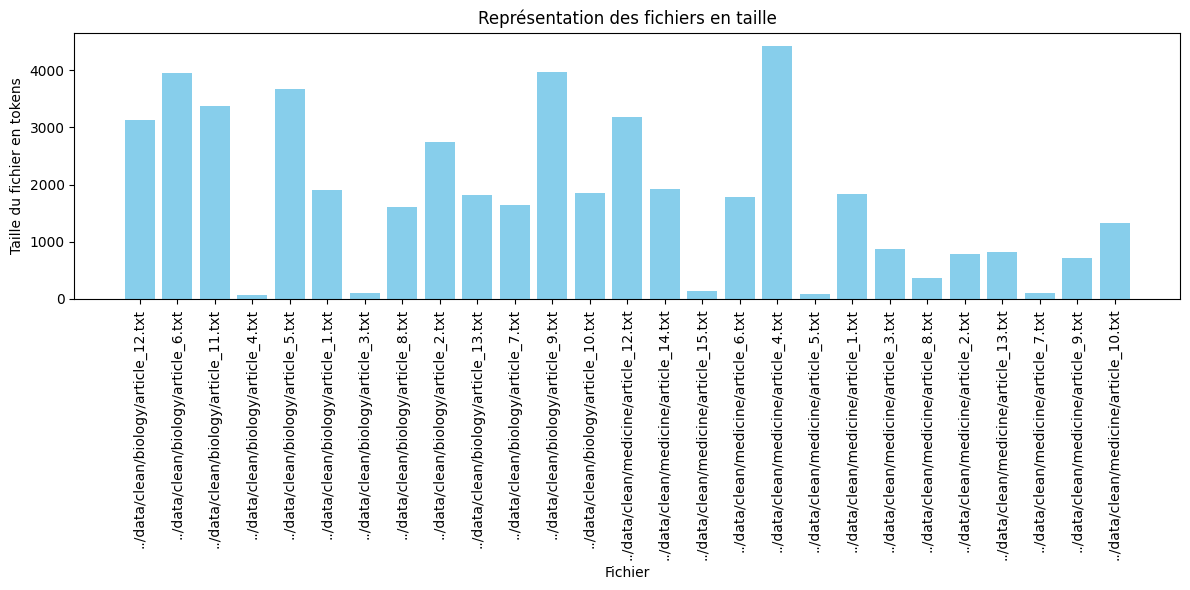

In [20]:
directory_path = '../data/clean'
file_token_counts = get_file_token_counts(directory_path)
plot_file_token_counts(file_token_counts)


### Répartition des annotations dans le corpus

#### NER tags

Ensuite, je veux connaître la répartition entre les tokens qui ne sont pas abréviations (B-O), les abréviations (B-AC) et les formes longues (B-LF & I-LF)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

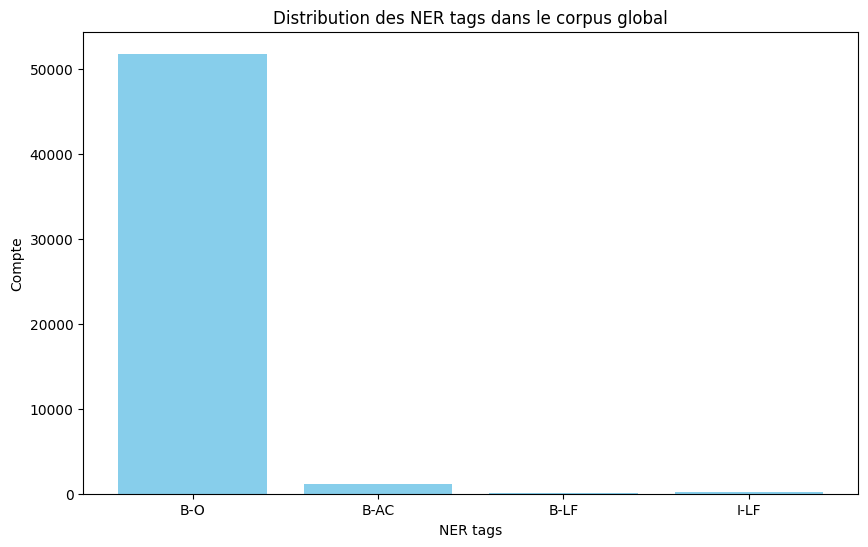

In [14]:
csv_file_path = "../data/corpus.csv"
df = pd.read_csv(csv_file_path)

all_tags = [tag for tags in df['ner_tags'].apply(eval) for tag in tags]
tags_of_interest = ['B-O', 'B-AC', 'B-LF', 'I-LF']
tag_counts = {tag: all_tags.count(tag) for tag in tags_of_interest}

plt.figure(figsize=(10, 6))
plt.bar(tag_counts.keys(), tag_counts.values(), color='skyblue')
plt.xlabel('NER tags')
plt.ylabel('Compte')
plt.title('Distribution des NER tags dans le corpus global')
plt.show()


#### POS tags

Maintenant, je souhaite inspecter la répartition des POS dans mon corpus global

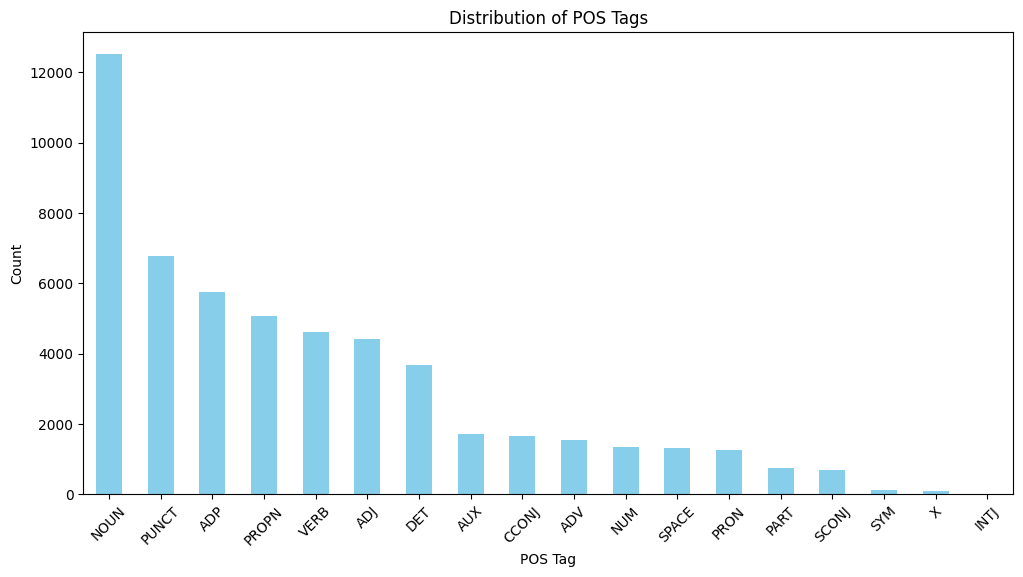

In [15]:
df['pos_tags'] = df['pos_tags'].apply(eval)

all_pos_tags = [tag for tags in df['pos_tags'] for tag in tags]

pos_tag_counts = pd.Series(all_pos_tags).value_counts()

plt.figure(figsize=(12, 6))
pos_tag_counts.plot(kind='bar', color='skyblue')
plt.xlabel('POS tags')
plt.ylabel('Compte')
plt.title('Répartition des POS tags dans le corpus global')
plt.xticks(rotation=45)
plt.show()


### Taille de chaque colonne du corpus

Pour chaque phrase, je compare si la taille est la même pour les trois colonnes

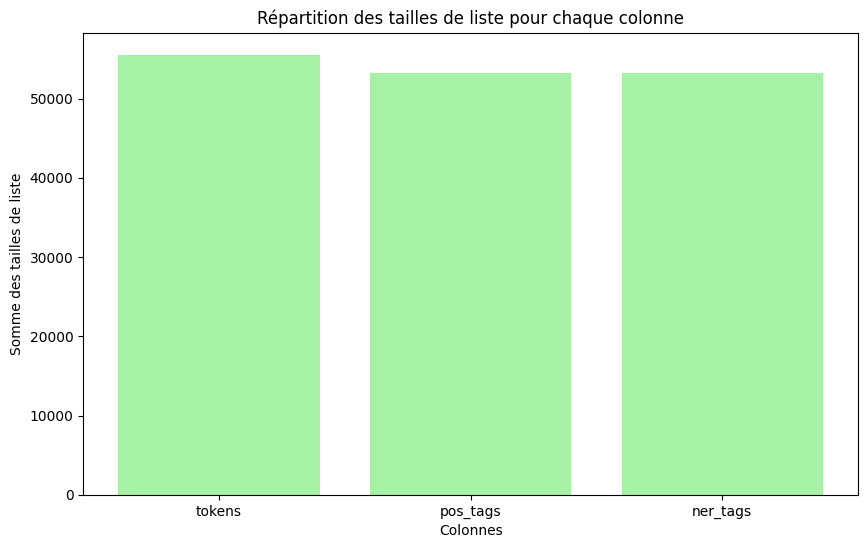

In [45]:
df = pd.read_csv('../data/corpus.csv')

df['tokens_count'] = df['tokens'].apply(lambda x: len(x.split(',')))
df['pos_tags_count'] = df['pos_tags'].apply(lambda x: len(x.split(',')))
df['ner_tags_count'] = df['ner_tags'].apply(lambda x: len(x.split(',')))

df_sizes = df[['tokens_count', 'pos_tags_count', 'ner_tags_count']]

sum_tokens = df_sizes['tokens_count'].sum()
sum_pos_tags = df_sizes['pos_tags_count'].sum()
sum_ner_tags = df_sizes['ner_tags_count'].sum()

categories = ['tokens', 'pos_tags', 'ner_tags']
sum_sizes = [sum_tokens, sum_pos_tags, sum_ner_tags]

plt.figure(figsize=(10, 6))
plt.bar(categories, sum_sizes, color='lightgreen', alpha=0.8)
plt.title('Répartition des tailles de liste pour chaque colonne')
plt.xlabel('Colonnes')
plt.ylabel('Somme des tailles de liste')
plt.show()


## Reproduction des statistiques du papier du corpus PLOD/CW

### Pie plot

Je souhaite observer la taille des abbréviations (en nombre de caractères)

In [4]:
from abbreviations_formated import process_abbreviation_files
folder_path = '../data/abbreviations/abbreviations-clean/'
annotations = process_abbreviation_files(folder_path)
annotations

{'ATGL': 'B-AC',
 'adipose triglyceride lipase': [{'token': 'adipose', 'label': 'B-LF'},
  {'token': 'triglyceride', 'label': 'I-LF'},
  {'token': 'lipase', 'label': 'I-LF'}],
 'CKD': 'B-AC',
 'chronic kidney disease': [{'token': 'chronic', 'label': 'B-LF'},
  {'token': 'kidney', 'label': 'I-LF'},
  {'token': 'disease', 'label': 'I-LF'}],
 'CLEM': 'B-AC',
 'correlative light electron microscopy': [{'token': 'correlative',
   'label': 'B-LF'},
  {'token': 'light', 'label': 'I-LF'},
  {'token': 'electron', 'label': 'I-LF'},
  {'token': 'microscopy', 'label': 'I-LF'}],
 'CNS': 'B-AC',
 'central nervous system': [{'token': 'central', 'label': 'B-LF'},
  {'token': 'nervous', 'label': 'I-LF'},
  {'token': 'system', 'label': 'I-LF'}],
 'Cubn': 'B-AC',
 'Cubilin': [{'token': 'Cubilin', 'label': 'B-LF'}],
 'DGAT1': 'B-AC',
 'diglyceride acyltransferase 1': [{'token': 'diglyceride', 'label': 'B-LF'},
  {'token': 'acyltransferase', 'label': 'I-LF'},
  {'token': '1', 'label': 'I-LF'}],
 'EI': 'B-A

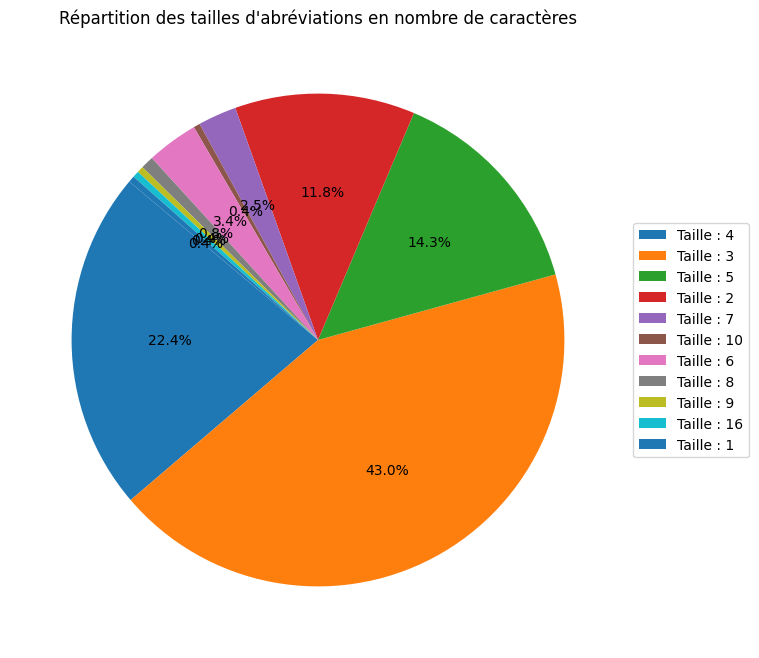

In [26]:
size_counts = {}
for abbreviation, label in annotations.items():
    if label == 'B-AC':
        size = len(abbreviation)
        if size in size_counts:
            size_counts[size] += 1
        else:
            size_counts[size] = 1

sizes = list(size_counts.values())

plt.figure(figsize=(8, 8))
plt.pie(sizes, autopct='%1.1f%%', startangle=140)
legend_labels = [f'Taille : {size}' for size in size_counts.keys()]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Répartition des tailles d\'abréviations en nombre de caractères')
plt.show()

Je fais la même chose pour connaître la taille des formes longues (en nombre de tokens)

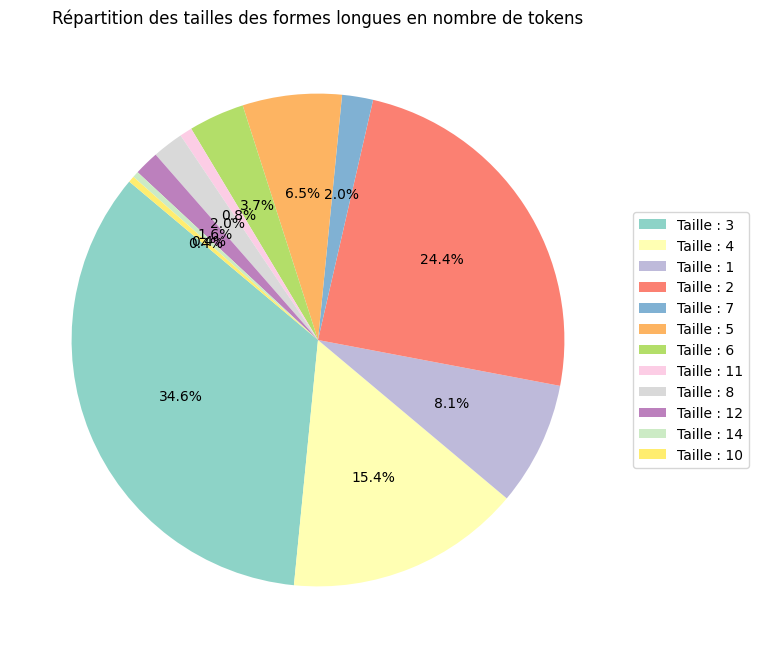

In [25]:
token_counts = {}
for _, tokens in annotations.items():
    if isinstance(tokens, list):
        size = len(tokens)
        if size in token_counts:
            token_counts[size] += 1
        else:
            token_counts[size] = 1

sizes = list(token_counts.values())
colors = plt.cm.Set3.colors[:len(token_counts)]

plt.figure(figsize=(8, 8))
plt.pie(sizes, autopct='%1.1f%%', colors=colors, startangle=140)

legend_labels = [f'Taille : {size}' for size in token_counts.keys()]

plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Répartition des tailles des formes longues en nombre de tokens')
plt.show()



## Loi de Zipf

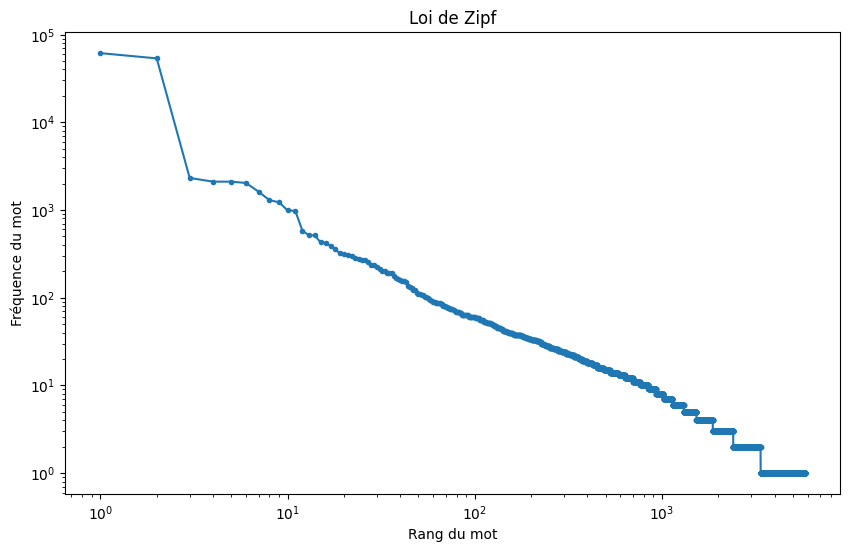

In [47]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

df = pd.read_csv('../data/corpus.csv')
tokens = df['tokens'].tolist()

all_tokens = [token.lower() for sublist in tokens for token in word_tokenize(sublist)]

freq_dist = nltk.FreqDist(all_tokens)

sorted_tokens = sorted(freq_dist.items(), key=lambda item: item[1], reverse=True)
frequencies = [freq for token, freq in sorted_tokens]
ranks = list(range(1, len(frequencies) + 1))

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.')
plt.title("Loi de Zipf")
plt.xlabel('Rang du mot')
plt.ylabel('Fréquence du mot')
plt.show()
